# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# DONE: Fill this in based on where you saved the training and testing data

training_file = '../../Assets/data/traffic-signs-data/train.p'
validation_file= '../../Assets/data/traffic-signs-data/valid.p'
testing_file = '../../Assets/data/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# DONE: Number of training examples
n_train = len(X_train)

# DONE: Number of validation examples
n_validation = len(X_valid)

# DONE: Number of testing examples.
n_test = len(X_test)

# DONE: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:4]

# DONE: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

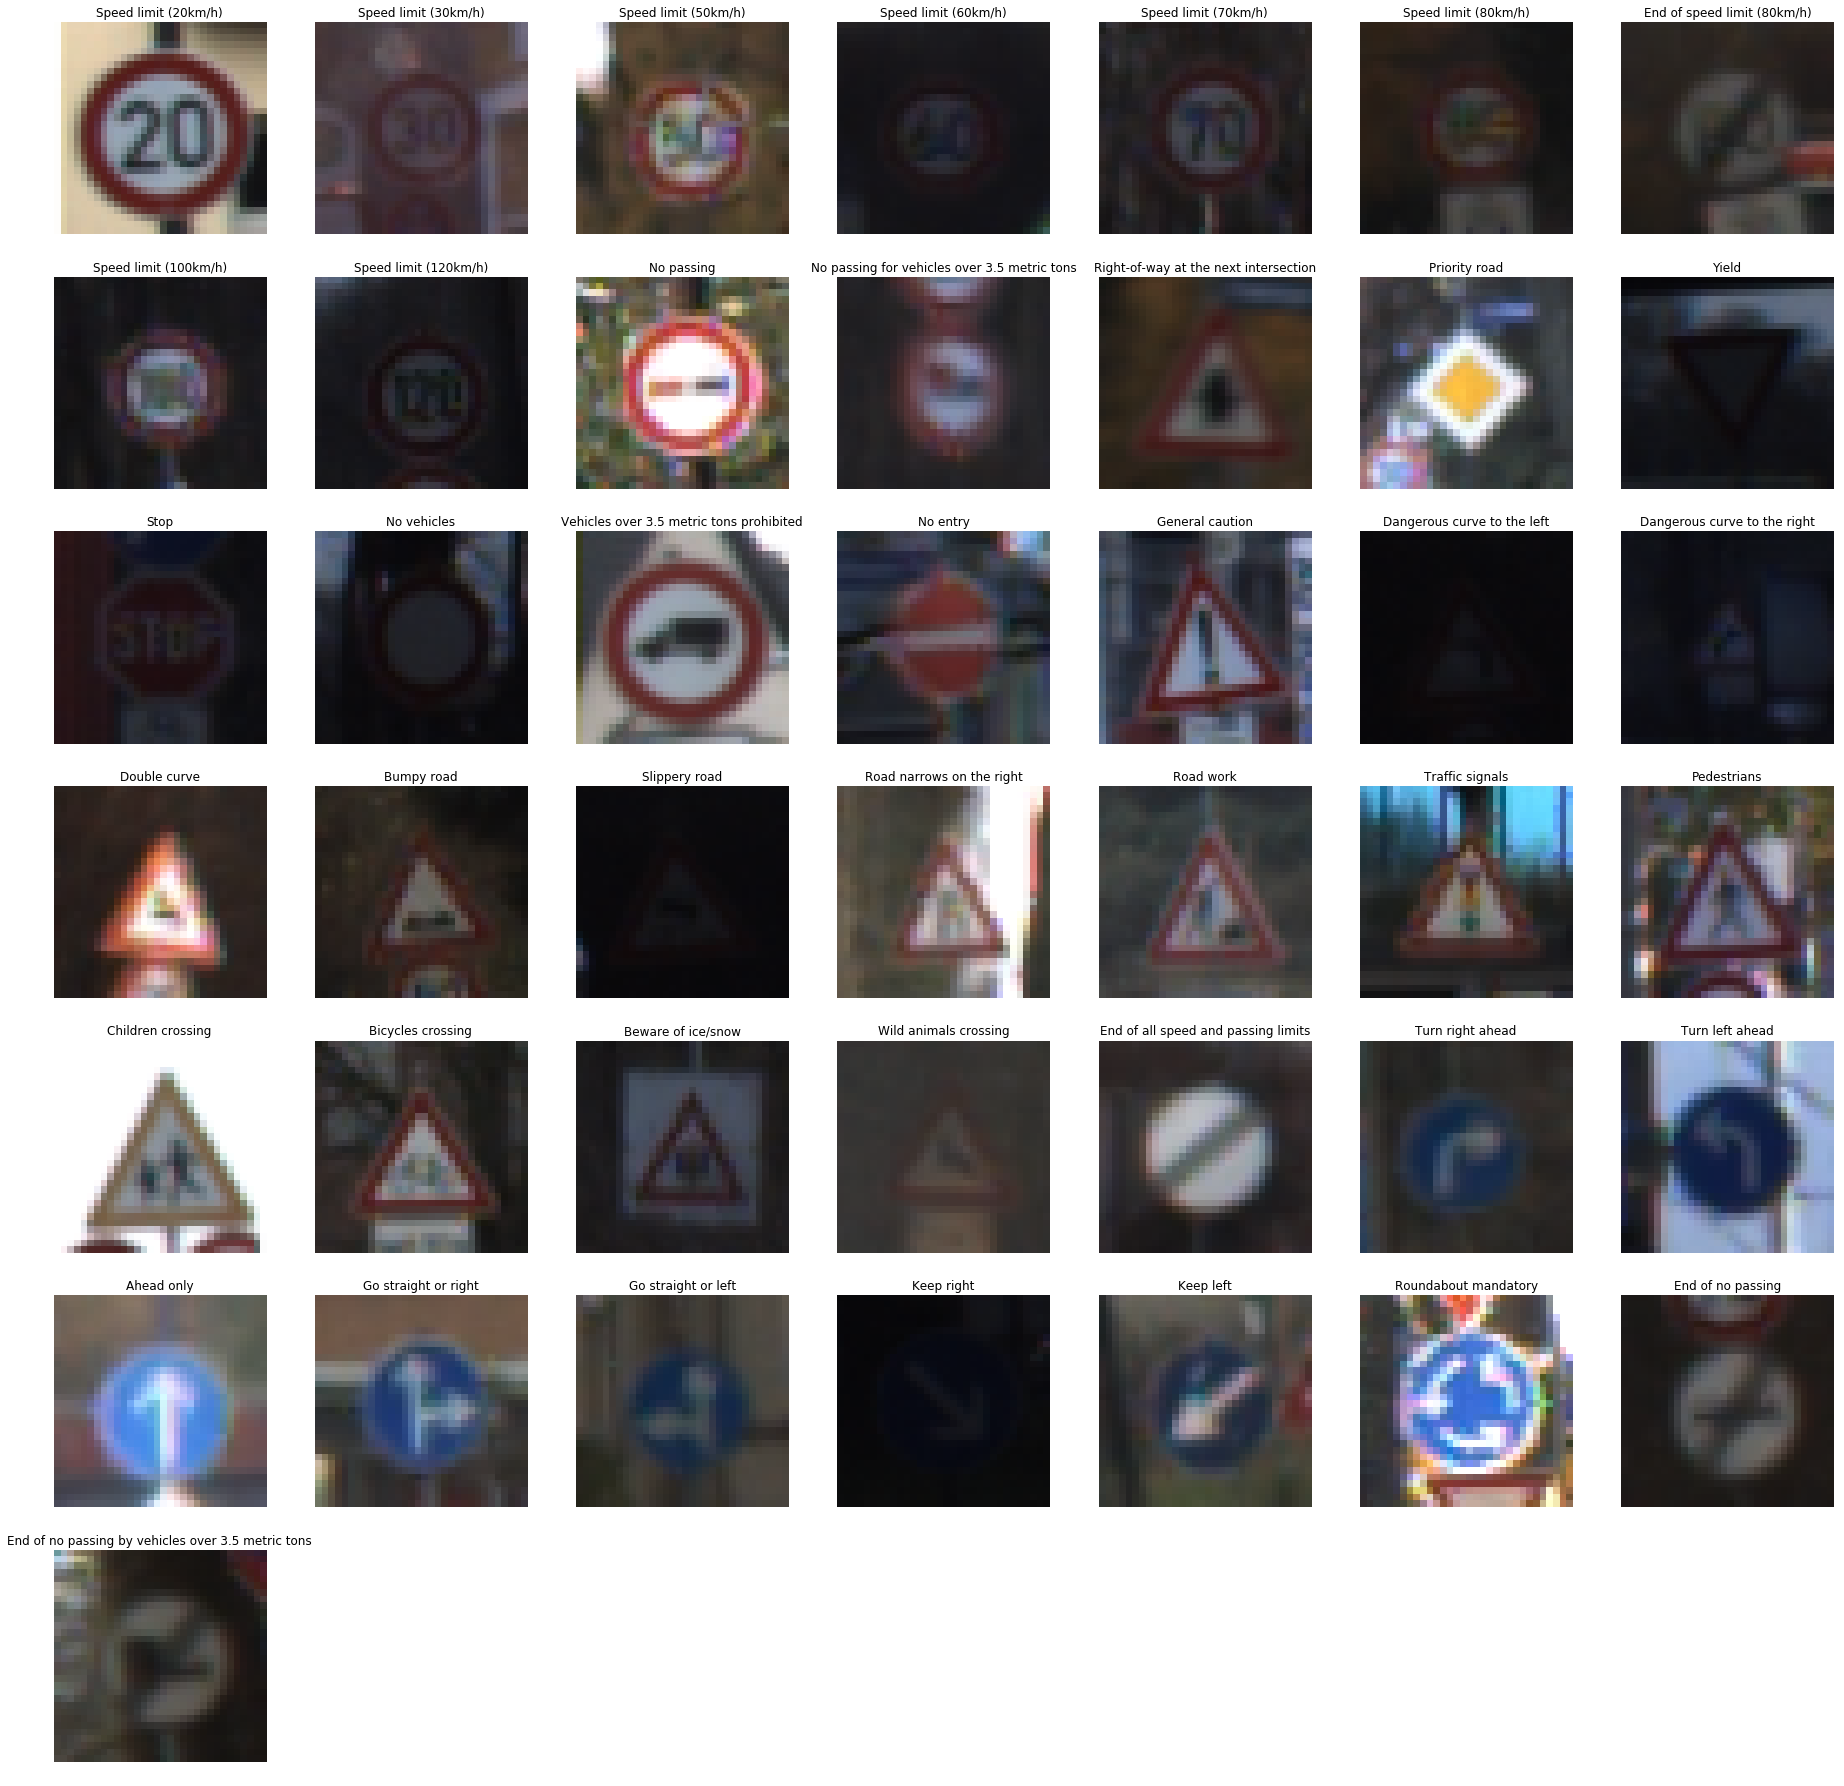

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import numpy as np
import csv
# Visualizations will be shown in the notebook.
%matplotlib inline

fig = plt.figure(figsize =(32,32))
aUniqueLabels, aUniqueIndices = np.unique(y_train, return_index = True)

# DONE: plot all the sign images and match them with the names in excel sheet
with open('signnames.csv', 'rt') as f:
    oCsvNameSets = csv.reader(f)
    aSignNameSets = list(oCsvNameSets)
    
    for i, idx in enumerate(aUniqueIndices):
        fig.add_subplot(7, 7, i+1)
        plt.axis('off')
        # get the sign name, add 1 bias to first entry because the data starts in second row
        # Since the string value resides in the second entry of the sets, thus [1]
        sSignName = aSignNameSets[i + 1][1] 
        plt.title(sSignName)
        image = X_train[idx]
        plt.imshow(image)
f.close()
plt.show()

[]

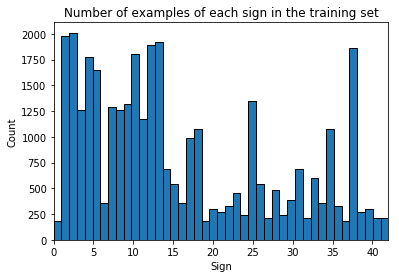

In [4]:
# DONE: Plot the histogram of the training set 
plt.hist(y_train, bins=n_classes, ec = 'k')
plt.title('Number of examples of each sign in the training set')
plt.xlabel('Sign')
plt.ylabel('Count')
plt.xlim(0, max(aUniqueLabels))
plt.plot()

### <span style="color:darkcyan"> Implementation Note:</span>
As we can observe, some traffic sign class have much smaller sample size than average. Have such training setup would make the model skew towards other class that has more samples, making the predict for classes with fewer samples inaccurate. To improve on such matter, we can perform data augmentation to artificially generate more data for classes that have fewer samples.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

### <span style="color:darkcyan">Implementation Note: Image Augmentation </span>
Extra samples for classes with fewer sample counts are generated through following steps:
1. All training images will be normalized to grayscale image, (pixel - 128)/ 128, before any data augmentation starts
2. Number of samples for each class are measured against the average samples for all sign classes
3. If the sample count for current class is fewer than average, extra sign images will be artificially generated until the total sample size (existing + new) is no less than the average sample size
4. Each aritificially generated image are randomed applied with image warp, zoom, translation and brightness adjustments

In [5]:
import sys
import numpy as np
import pickle
import matplotlib.pyplot as plt
import os.path
import cv2
import random

def getRandomAugmentedImage(img):
    return getImageTranslate(getImagePerspectiveChange(getImageWarp(getImageBrightnessAdjust(img))))

def getImageDimension(image):
    height = image.shape[0]
    width = image.shape[1]
    return height, width

def getImageWarp(image):
    rows, cols  = getImageDimension(image)

    rndx = (np.random.rand(3) - 0.5) * cols * 0.06
    rndy = (np.random.rand(3) - 0.5) * rows * 0.06

    originalLocations = np.float32([[rows/4, cols/4],
                                    [rows * 3/4, cols/4],
                                    [rows/4, cols * 3/4]])
    warpLocations = np.float32([[rows/4 + rndy[0], cols/4 + rndx[0]],
                                [rows * 3/4 + rndy[1], cols/4 + rndx[1]],
                                [rows/4 + rndy[2], cols * 3/4 + rndx[2]]])

    warpingMatrix = cv2.getAffineTransform(originalLocations, warpLocations)

    warpedImage = cv2.warpAffine(image, warpingMatrix, (cols, rows))
    
    return warpedImage[:,:,np.newaxis]

def getImageTranslate(image):    
    rows, cols  = getImageDimension(image)

    numPixelsToShift = 2
    
    iXshift = np.random.randint(-numPixelsToShift, numPixelsToShift)
    iYshift = np.random.randint(-numPixelsToShift, numPixelsToShift)

    translateMatrix = np.float32([[1, 0, iXshift],[0, 1, iYshift]])
    translatedImage = cv2.warpAffine(image, translateMatrix, (cols, rows))
    
    return translatedImage[:,:,np.newaxis]

def getImagePerspectiveChange(image):
    rows, cols = getImageDimension(image)

    numPixelsToShift = np.random.randint(-2,2)

    pts1 = np.float32([[numPixelsToShift, numPixelsToShift],
                        [rows - numPixelsToShift, numPixelsToShift],
                        [numPixelsToShift, cols - numPixelsToShift],
                        [rows - numPixelsToShift, cols - numPixelsToShift]])

    pts2 = np.float32([[0, 0],
                       [rows, 0],
                       [0, cols],
                       [rows, cols]])

    transformMaxtrix = cv2.getPerspectiveTransform(pts1,pts2)

    transformedImage = cv2.warpPerspective(image, transformMaxtrix, (rows, cols))
    
    return transformedImage[:,:,np.newaxis]

def getImageBrightnessAdjust(image):
    imageBrightnessBiased = image + 1.0   # shift to (0,2) range
    fMaxPixelValue = max(imageBrightnessBiased.flatten())
    fMaxCoef = 2.0/fMaxPixelValue
    fMinCoef = fMaxCoef - 0.1
    fCoef = np.random.uniform(fMinCoef, fMaxCoef)
    return imageBrightnessBiased * fCoef - 1.0

In [6]:
def save_data(dataToSave, saveName):
    savePath = "../../Assets/data/" + saveName +".p"
    pickle.dump(dataToSave, open(savePath, "wb" ) )
    
def getGrayScaleDataset(data): 
    dataGrayscale = np.sum(data/3, axis=3, keepdims=True)
    return (dataGrayscale - 128)/128 

In [7]:
def agumentDatasets(X_train, y_train):
    # Done: initializations
    separated_data = []
    augmentedData   = np.array(np.zeros((1, 32, 32, 1)))
    agumentedDataLabels = np.array([0])
    
    # Done: get some constants
    totalNumberSigns = len(set(y_train))
    ts, imagesPerSign = np.unique(y_train, return_counts=True)
    aveNumImgPerSign = int(np.ceil(np.mean(imagesPerSign)))

    for traffic_sign in range(totalNumberSigns):
        imagesForThisSign = X_train[y_train == traffic_sign, ...]
        separated_data.append(imagesForThisSign)

    for sign, signImages in enumerate(separated_data):
        newImages = []        
        numImageForThisSign = len(signImages)
        
        # Done: if there are not enough data, make some by augmenting existing images
        if numImageForThisSign < aveNumImgPerSign:
            for i in range(aveNumImgPerSign - numImageForThisSign):
                img = signImages[i % numImageForThisSign]
                augmentedImage = getRandomAugmentedImage(img)
                newImages.append(augmentedImage)

        # Done: combine existing images with the new augmented set, if the new set exists
        if len(newImages) > 0:
            signImages = np.concatenate((signImages, newImages), axis=0)
        
        newLabels = np.full(len(signImages), sign, dtype='uint8')

        augmentedData = np.concatenate((augmentedData, signImages), axis=0)
        agumentedDataLabels = np.concatenate((agumentedDataLabels, newLabels), axis=0)

    return augmentedData[1:], agumentedDataLabels[1:]

### <span style="color:darkcyan">Demonstration of Image Augmentation </span>

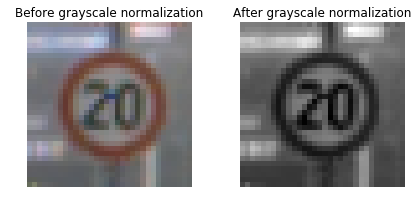

In [9]:
# Here is an example of a traffic sign image before and after grayscaling

# Before
originalImg = X_train[10000]

#After
X_train_gray_norm = getGrayScaleDataset(X_train)
img = X_train_gray_norm[10000]

plt.subplot(1, 2, 1), plt.imshow(originalImg),  plt.axis('off'), plt.title('Before grayscale normalization')
plt.subplot(1, 2, 2), plt.imshow(img.squeeze(), cmap='gray'),  plt.axis('off'), plt.title('After grayscale normalization')
plt.tight_layout()
plt.savefig('original vs grascale normalized.png')

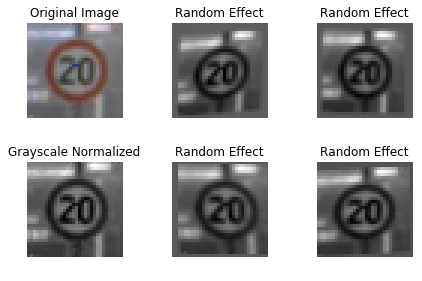

In [10]:
# Performing data augmentation
randomChained_img = []
for i in range(4):
    randomChained_img.append(getImageTranslate(getImagePerspectiveChange(getImageWarp(getImageBrightnessAdjust(img)))))
    
plt.subplot(2, 3, 1), plt.imshow(originalImg),  plt.axis('off'), plt.title('Original Image') 
plt.subplot(2, 3, 2), plt.imshow(randomChained_img[0].squeeze(), cmap='gray'),  plt.axis('off'), plt.title('Random Effect')
plt.subplot(2, 3, 3), plt.imshow(randomChained_img[1].squeeze(), cmap='gray'),  plt.axis('off'), plt.title('Random Effect')
plt.subplot(2, 3, 4), plt.imshow(img.squeeze(), cmap='gray'),  plt.axis('off'), plt.title('Grayscale Normalized')
plt.subplot(2, 3, 5), plt.imshow(randomChained_img[2].squeeze(), cmap='gray'),  plt.axis('off'), plt.title('Random Effect')
plt.subplot(2, 3, 6), plt.imshow(randomChained_img[3].squeeze(), cmap='gray'),  plt.axis('off'), plt.title('Random Effect')
plt.tight_layout()
plt.savefig('original vs randome augmentation.png')

In [11]:
# Done: normalize the validation data
X_valid_gray_norm =  getGrayScaleDataset(X_valid)
X_test_gray_norm =  getGrayScaleDataset(X_test)

# Done: get the augmented data sets with normalized training data
new_features_gray,  new_labels = agumentDatasets(X_train_gray_norm, y_train)

### <span style="color:darkcyan">Histogram comparison </span>

[]

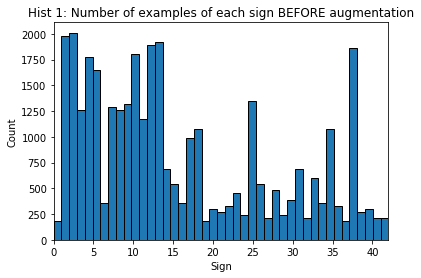

In [12]:
# DONE: plot the histogram before the data augmentation
plt.hist(y_train, bins=n_classes, ec = 'k')
plt.title('Hist 1: Number of examples of each sign BEFORE augmentation')
plt.xlabel('Sign')
plt.ylabel('Count')
plt.xlim(0, max(aUniqueLabels))
plt.plot()

[]

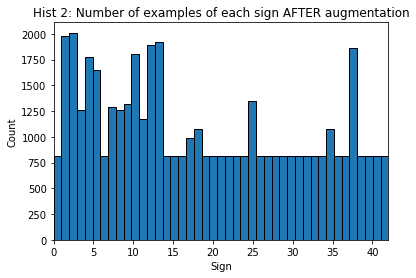

In [13]:
# DONE: plot the histogram after the data augmentation
plt.hist(new_labels, bins=n_classes, ec = 'k')
plt.title('Hist 2: Number of examples of each sign AFTER augmentation')
plt.xlabel('Sign')
plt.ylabel('Count')
plt.xlim(0, max(aUniqueLabels))
plt.plot()

### Model Architecture

I simply adopted LeNet architecture as it performs reasonably well with my augmented data sets

| Layer         		|     Description	        					| 
|:---------------------:|:---------------------------------------------:| 
| Input         		| 32x32x1 grayscale normalized image   			| 
| Convolution 5x5     	| 1x1 stride, valid padding, outputs 28x28x6 	|
| RELU					|												|
| Max pooling 2x2	    | 2x2 stride,  outputs 14x14x6 			        |
| Convolution 5x5	    | 1x1 stride, valid padding, outputs 10x10x16   |
| RELU					|												|
| Max pooling 2x2	    | 2x2 stride,  outputs 5x5x16 			        |
| Flatten				| outputs 400									|
| Fully connected		| outputs 120        							|
| RELU					|												|
| Dropout 				| keep_prob = 0.5								|
| Fully connected		| outputs 84        							|
| RELU					|												|
| Dropout 				| keep_prob = 0.5								|
| Fully connected		| outputs 43        							|

In [14]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
from tensorflow.contrib.layers import flatten
import tensorflow as tf

# DONE: using exising leNet model
def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # DONE: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6))
    x = tf.nn.bias_add(x, b1)

    # DONE: Activation.
    x = tf.nn.relu(x)
    
    # DONE: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # DONE: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16))
    x = tf.nn.bias_add(x, b2)
                     
    # DONE: Activation.
    x = tf.nn.relu(x)

    # DONE: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # DONE: Flatten. Input = 5x5x16. Output = 400.
    x = flatten(x)
    
    # DONE: Layer 3: Fully Connected. Input = 400. Output = 120.
    W3 = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    b3 = tf.Variable(tf.zeros(120))    
    x = tf.add(tf.matmul(x, W3), b3)
    
    # DONE: Activation.
    x = tf.nn.relu(x)
    
    # DONE: Dropout
    x = tf.nn.dropout(x, keep_prob)

    # DONE: Layer 4: Fully Connected. Input = 120. Output = 84.
    W4 = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    b4 = tf.Variable(tf.zeros(84)) 
    x = tf.add(tf.matmul(x, W4), b4)
    
    # DONE: Activation.
    x = tf.nn.relu(x)
    
    # DONE: Dropout
    x = tf.nn.dropout(x, keep_prob)

    # DONE: Layer 5: Fully Connected. Input = 84. Output = 43.
    W5 = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    b5 = tf.Variable(tf.zeros(43)) 
    logits = tf.add(tf.matmul(x, W5), b5)
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### <span style="color:darkcyan">Model Parameters</span>
The model parameters are:

| Parameters     | value	         | 
|:--------------:|:-----------------:| 
| Optimizer      | adam optimizer    | 
| Input     	 | 32 x 32 x 1 image |
| Dropout		 | 0.5				 |
| Epochs	     | 50 			     |
| Batch Size	 | 128               |
| learning rate	 | 0.0009			 |
| mu	         | 0 			     |
| sigma			 | 0.1				 |

In [48]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

tf.reset_default_graph() 

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) 
one_hot_y = tf.one_hot(y, 43)

In [49]:
learningRate = 0.0009  #0.0009 is good~
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits, labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learningRate)
training_operation = optimizer.minimize(loss_operation)

In [50]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset + BATCH_SIZE], y_data[offset:offset + BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

EPOCH 1 ... Validation Accuracy = 0.680
EPOCH 2 ... Validation Accuracy = 0.842
EPOCH 3 ... Validation Accuracy = 0.867
EPOCH 4 ... Validation Accuracy = 0.903
EPOCH 5 ... Validation Accuracy = 0.918
EPOCH 6 ... Validation Accuracy = 0.931
EPOCH 7 ... Validation Accuracy = 0.935
EPOCH 8 ... Validation Accuracy = 0.941
EPOCH 9 ... Validation Accuracy = 0.948
EPOCH 10 ... Validation Accuracy = 0.949
EPOCH 11 ... Validation Accuracy = 0.950
EPOCH 12 ... Validation Accuracy = 0.954
EPOCH 13 ... Validation Accuracy = 0.948
EPOCH 14 ... Validation Accuracy = 0.945
EPOCH 15 ... Validation Accuracy = 0.950
EPOCH 16 ... Validation Accuracy = 0.957
EPOCH 17 ... Validation Accuracy = 0.960
EPOCH 18 ... Validation Accuracy = 0.961
EPOCH 19 ... Validation Accuracy = 0.962
EPOCH 20 ... Validation Accuracy = 0.964
EPOCH 21 ... Validation Accuracy = 0.965
EPOCH 22 ... Validation Accuracy = 0.961
EPOCH 23 ... Validation Accuracy = 0.965
EPOCH 24 ... Validation Accuracy = 0.965
EPOCH 25 ... Validation A

Text(0,0.5,'Accuracy')

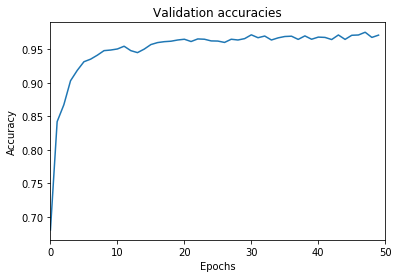

In [51]:
from sklearn.utils import shuffle
EPOCHS = 50
BATCH_SIZE = 128

aValidationAccuracies = []
with tf.Session() as sess:
    saver = tf.train.Saver()
    sess.run(tf.global_variables_initializer())
    num_examples = len(new_features_gray)

    for i in range(EPOCHS):
        new_features_gray, new_labels = shuffle(new_features_gray, new_labels)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = new_features_gray[offset:end], new_labels[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid_gray_norm, y_valid)
        print("EPOCH {} ...".format(i+1),"Validation Accuracy = {:.3f}".format(validation_accuracy))
        aValidationAccuracies.append(validation_accuracy)
        
    saver.save(sess, './lenet')
    print("Model saved")

# DONE: plot the validation accuray
plt.plot(aValidationAccuracies)
plt.xlim(0, len(aValidationAccuracies))
plt.title('Validation accuracies')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

In [36]:
def printTestAccuracy(testData, testLabels):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        saver = tf.train.import_meta_graph('./lenet.meta')
        saver.restore(sess, "./lenet")
        test_accuracy = evaluate(testData, testLabels)
        print("testData accuracy = {:.2f}%".format(test_accuracy * 100))

In [52]:
# DONE: test the model accuracy using test data
printTestAccuracy(X_test_gray_norm, y_test)

INFO:tensorflow:Restoring parameters from ./lenet
testData accuracy = 94.62%


##### <span style="color:darkcyan">My final model results achieved 94.62% against test data</span>

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

#### <span style="color:darkcyan">Here are 10 German traffic signs that I found on the web:</span>

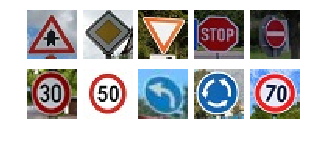

In [38]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,5, figsize=(5, 2))
fig.subplots_adjust(hspace = .2, wspace=.001)
axs = axs.ravel()

verificationImages = []

for i, img in enumerate(glob.glob('./germanTrafficSign/*e.jpg')):
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axs[i].axis('off')
    axs[i].imshow(image)
    verificationImages.append(image)

verificationImages = np.asarray(verificationImages)

### Predict the Sign Type for Each Image

In [53]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# DONE: preprocess the image
verificationImages_gray_norm = getGrayScaleDataset(verificationImages)
verificationLabels = [11, 12, 13, 14, 17, 1, 2, 34, 40, 4]

printTestAccuracy(verificationImages_gray_norm, verificationLabels)

INFO:tensorflow:Restoring parameters from ./lenet
testData accuracy = 100.00%


<span style="color:darkcyan">For the images I found online, I achieved the prediction accuracy of __</span>

### Analyze Performance

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet


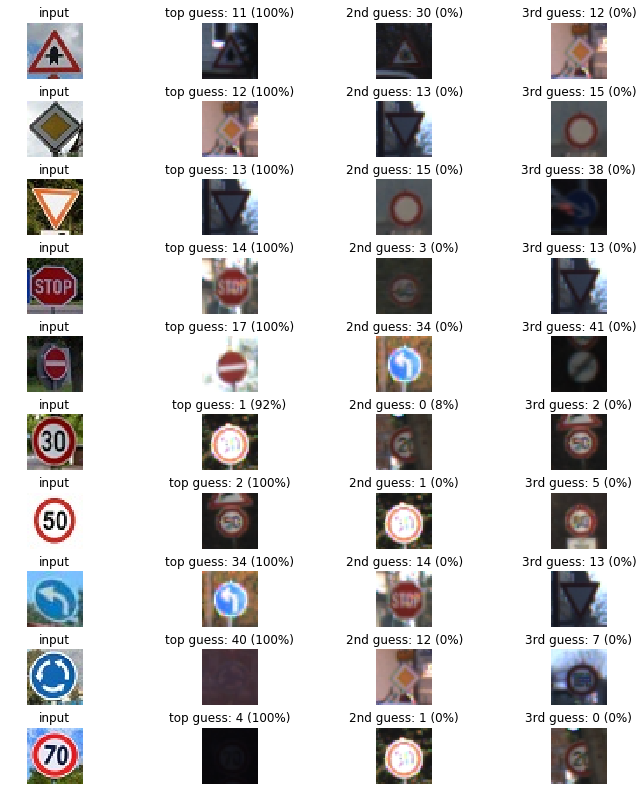

In [54]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: verificationImages_gray_norm, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: verificationImages_gray_norm, keep_prob: 1.0})

    
    fig, axs = plt.subplots(len(verificationImages),4, figsize=(12, 14))
    fig.subplots_adjust(hspace = .4, wspace=.2)
    axs = axs.ravel()

    for i, image in enumerate(verificationImages):
        axs[4*i].axis('off')
        axs[4*i].imshow(image)
        axs[4*i].set_title('input')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_valid == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_valid[index1].squeeze(), cmap='gray')
        axs[4*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_valid == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_valid[index2].squeeze(), cmap='gray')
        axs[4*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_valid == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_valid[index3].squeeze(), cmap='gray')
        axs[4*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))

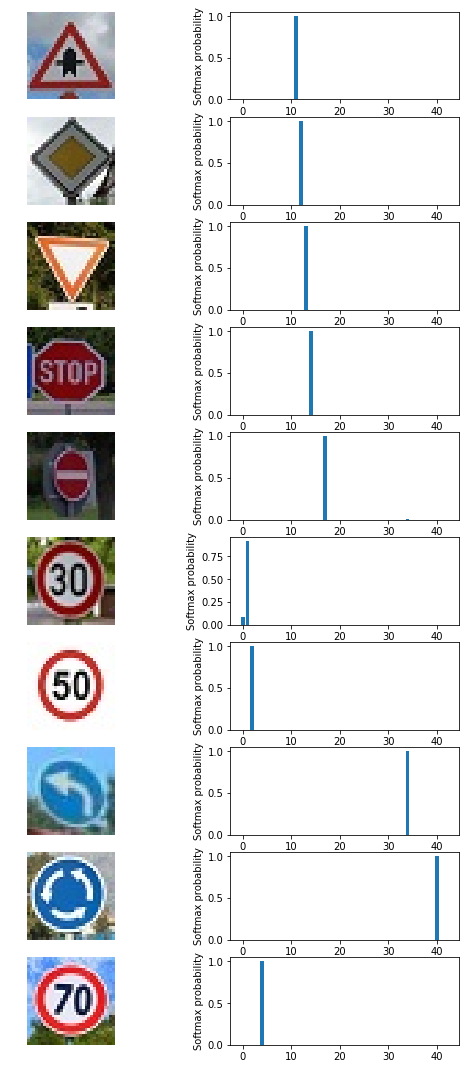

In [55]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
fig, axs = plt.subplots(10,2, figsize=(9, 19))
axs = axs.ravel()

for i in range(len(my_softmax_logits)*2):
    if i%2 == 0:
        axs[i].axis('off')
        axs[i].imshow(verificationImages[i//2])
    else:
        axs[i].bar(np.arange(n_classes), my_softmax_logits[(i-1)//2]) 
        axs[i].set_ylabel('Softmax probability')

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

# TODO: I don't think I will have the time for this.......

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")